<a href="https://colab.research.google.com/github/AyushKumar177/google-colab/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ds=pd.read_csv("Churn_Modelling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#binary classification problem for "Exited"

In [ ]:
#dividing dataset into dependent and independent feature
X=ds.iloc[:,3:13]
y=ds.iloc[:,13]

In [ ]:
#feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X.drop('Geography',axis=1,inplace=True)
X.drop('Gender',axis=1,inplace=True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#now we will create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#initialise the ANN
classifier=Sequential()

In [ ]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#we can also add dropout
#classifier.add(Dropout(0.3))

In [ ]:
#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
#compiling layer
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stopping
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=40,callbacks=early_stopping)

Epoch 1/40
536/536 [==============================] - 2s 5ms/step - loss: 0.3305 - accuracy: 0.8623 - val_loss: 0.3793 - val_accuracy: 0.8493
Epoch 2/40
536/536 [==============================] - 3s 6ms/step - loss: 0.3323 - accuracy: 0.8638 - val_loss: 0.3639 - val_accuracy: 0.8523
Epoch 3/40
536/536 [==============================] - 2s 5ms/step - loss: 0.3261 - accuracy: 0.8647 - val_loss: 0.3972 - val_accuracy: 0.8440
Epoch 4/40
536/536 [==============================] - 2s 5ms/step - loss: 0.3291 - accuracy: 0.8600 - val_loss: 0.3560 - val_accuracy: 0.8523
Epoch 5/40
536/536 [==============================] - 3s 5ms/step - loss: 0.3264 - accuracy: 0.8645 - val_loss: 0.3633 - val_accuracy: 0.8478
Epoch 6/40
536/536 [==============================] - 3s 5ms/step - loss: 0.3276 - accuracy: 0.8623 - val_loss: 0.3586 - val_accuracy: 0.8569
Epoch 7/40
536/536 [==============================] - 3s 6ms/step - loss: 0.3263 - accuracy: 0.8630 - val_loss: 0.3692 - val_accuracy: 0.8535
Epoch 

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

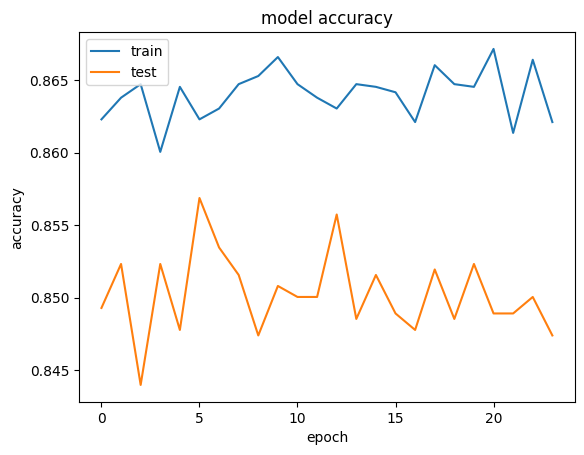

In [ ]:
#plotting the sunnary for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#now prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)
y_pred

63/63 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1565,   30],
       [ 249,  156]])

In [ ]:
from sklearn.metrics import accuracy_score
s=accuracy_score(y_pred,Y_test)
s

0.8605

In [ ]:
#how do we see weights
classifier.get_weights()

[array([[-2.3364239 , -0.10408407,  0.20740081, -0.35035595,  0.12940253,
         -0.04728569, -0.5733855 , -0.38060418,  0.30413854,  0.21291858,
          1.7772845 ],
        [-1.6616106 , -0.3125787 , -2.437811  , -1.637654  ,  2.7298691 ,
         -2.3923445 ,  1.6247841 ,  1.1330658 , -1.8670008 , -3.56856   ,
         -0.36132553],
        [ 0.1851566 ,  0.03677127,  1.3500724 , -0.26725608,  0.27876613,
          0.7589172 , -0.30627915,  0.14674436, -0.10478719, -0.7194635 ,
         -0.29384252],
        [-0.67368513,  0.2495821 , -1.7448215 ,  2.3816204 , -0.4158206 ,
          0.04524849,  2.2016506 , -1.8376303 , -0.58657056,  0.22638513,
         -1.377278  ],
        [ 0.69960207,  3.383897  , -0.40036887, -0.568455  , -0.11490558,
          0.32936344,  1.0365374 , -3.5691857 , -2.1505032 ,  0.24286889,
          1.2100335 ],
        [-0.35908303, -0.01109044, -1.0144179 , -0.4097726 , -0.4333079 ,
         -0.256478  , -0.92322123, -0.41465446,  1.8827777 , -0.7898792